In [ ]:
!pip install pymongo spacy Levenshtein

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/diploma/modules/")

In [ ]:
from storage import MongoDBStorage
from service import MongoDBSearchService

import pandas as pd
import seaborn as sns
import Levenshtein
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
with open("/content/drive/MyDrive/diploma/modules/db_host", "r") as file:
    host = file.read().rstrip()

storage = MongoDBStorage(parameters={
        "host_url": host
    })
search_service = MongoDBSearchService(storage)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def show_label_for_concat(test_df_list, label):
  for test_df in test_df_list:
    if not label in test_df:
      continue;
    print(f"Word cloud of '{label}' for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(" ".join(test_df[label]))
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


def show_label_for_plain(test_df_list, label):
  for test_df in test_df_list:
    if not label in test_df:
      continue;
    print(f"Word cloud of '{label}' for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(test_df[label])
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [ ]:

cursor = search_service.aggregate_filters_with_or([
        search_service.get_query_find_by_id('661931f5d172007aa8b18204'),
        search_service.get_query_find_by_id('661931fcd172007aa8b18205'),
        search_service.get_query_find_by_id('661931ffd172007aa8b18206'),
        search_service.get_query_find_by_id('663f15afd9798a05aae49f74'),
        search_service.get_query_find_by_id('663f15b0d9798a05aae49f75'),
        search_service.get_query_find_by_id('663f15b0d9798a05aae49f76')
    ])
test_df_list = []
for test_df in cursor:
    test_df_list.append(test_df)

In [ ]:
show_label_for_concat(test_df_list, 'keywords')

In [ ]:
show_label_for_concat(test_df_list, 'topics')

In [ ]:
show_label_for_plain(test_df_list, 'extracted_text')

In [ ]:
show_label_for_plain(test_df_list, 'summary')

In [ ]:
for test_df in test_df_list:
    if not 'extracted_text' in test_df:
      continue
    print(f"Named entities visualization '{test_df['_id']}'")
    doc = nlp(test_df['extracted_text'])
    colors = {"bg": "white"}
    options = {"ents": ["DATE", "EVENT", "FAC", "GPE", "LANGUAGE", "LAW", "LOC",
                                   "NORP", "ORG", "PERSON", "PRODUCT", "WORK_OF_ART"], "colors": colors}
    displacy.render(doc, style="ent", options=options)

In [ ]:
!pip install Levenshtein

Word cloud of 'summary' for '661931f5d172007aa8b18204'


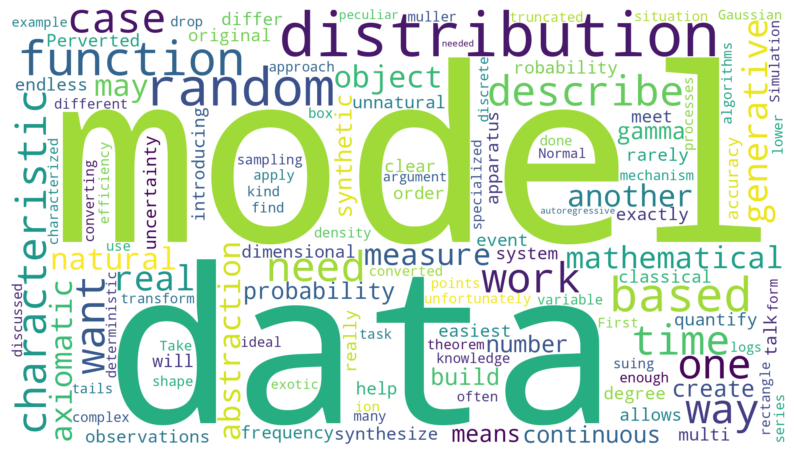

Word cloud of 'summary' for '661931fcd172007aa8b18205'


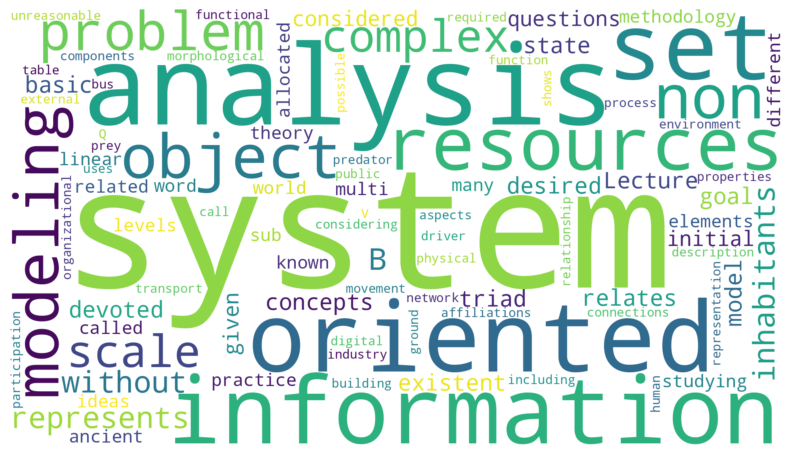

Word cloud of 'summary' for '661931ffd172007aa8b18206'


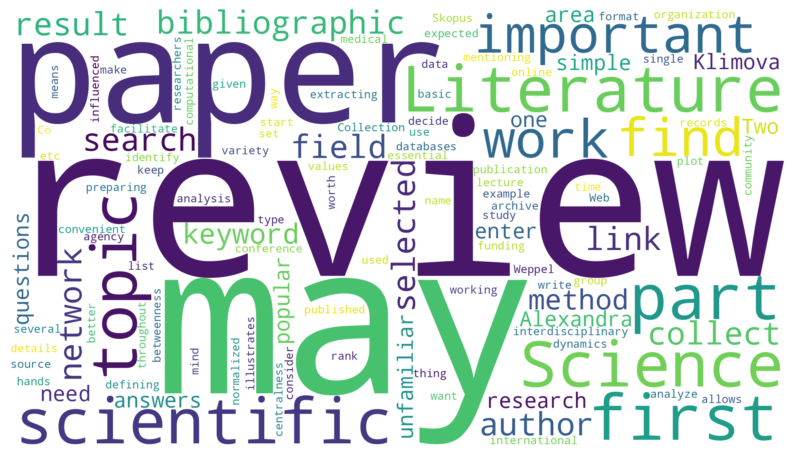

Word cloud of 'summary' for '663f15afd9798a05aae49f74'


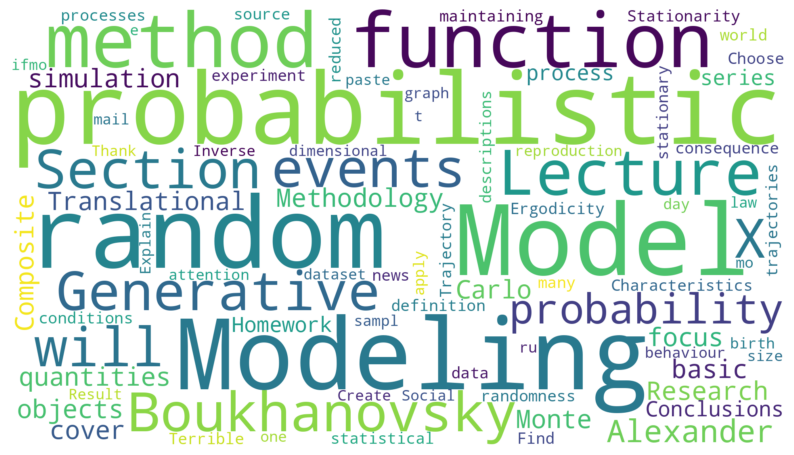

Word cloud of 'summary' for '663f15b0d9798a05aae49f75'


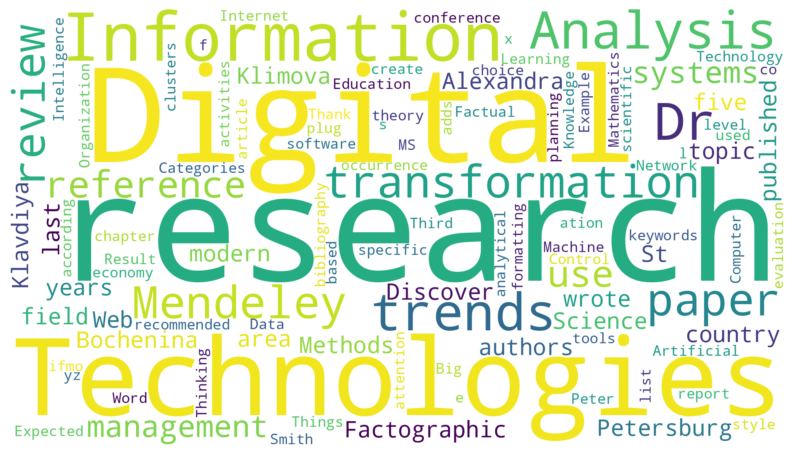

Word cloud of 'summary' for '663f15b0d9798a05aae49f76'


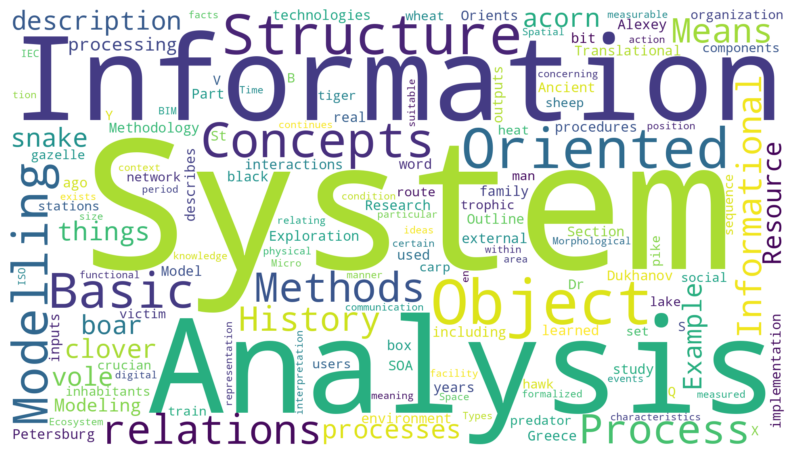

In [ ]:
show_label_for_plain(test_df_list, 'summary')

In [ ]:
for test_df in test_df_list:
    if not 'extracted_text' in test_df:
      continue
    print(f"Named entities visualization '{test_df['_id']}'")
    doc = nlp(test_df['extracted_text'])
    colors = {"bg": "white"}
    options = {"ents": ["DATE", "EVENT", "FAC", "GPE", "LANGUAGE", "LAW", "LOC",
                                   "NORP", "ORG", "PERSON", "PRODUCT", "WORK_OF_ART"], "colors": colors}
    displacy.render(doc, style="ent", options=options)

Named entities visualization '661931f5d172007aa8b18204'


Named entities visualization '661931fcd172007aa8b18205'


Named entities visualization '661931ffd172007aa8b18206'


In [ ]:
!pip install Levenshtein

In [ ]:
x_labels = test_df_list[0]['keywords']
y_labels = test_df_list[3]['keywords']

data = []
for x_label in x_labels:
  data_part = []
  data.append(data_part)
  for y_label in y_labels:
    data_part.append(Levenshtein.ratio(x_label, y_label))


df = pd.DataFrame(data, index=x_labels, columns=y_labels)

Text(0.5, 23.52222222222222, 'Presentation Keywords')

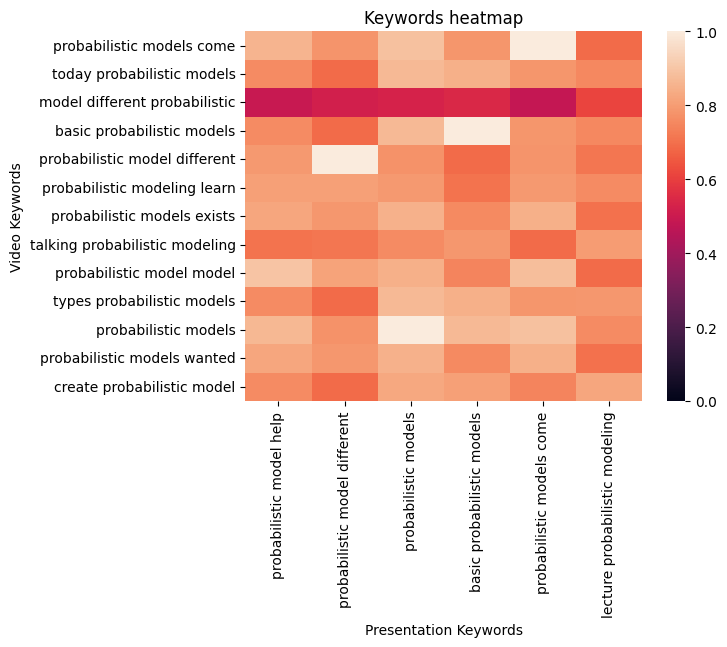

In [ ]:
sns.heatmap(df, vmin=0, vmax=1)
plt.title('Keywords heatmap')
plt.ylabel('Video Keywords')
plt.xlabel('Presentation Keywords')